In [2]:
# ipoting the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [3]:
#changing the directory to the directory where the dataset is present
os.chdir("/Users/divyanshraj/Desktop")



In [57]:
# reading the csv file using pandas
df = pd.read_csv("case_study_lybrate.csv",converters={"result": lambda x: x.strip("[]").replace("'","").split(", ")})



In [5]:
#adding all the labels to the genres list 
genres = []
for i in df['result']:
    genres.append(i)




In [6]:
genres

[['Greying Hair'],
 ['Depression'],
 ['Pregnant'],
 ['Difficulty Sleeping'],
 ['Cold Cough'],
 ['Anxiety'],
 ['Itching'],
 ['HIV AIDS'],
 ['Skin Whitening'],
 ['Sore Throat'],
 ['Sneezing'],
 ['Pregnant'],
 ['Sex Education'],
 ['Sex Education'],
 ['Abortion'],
 ['Stomach Pain'],
 ['Acne/Pimples'],
 ['Thyroid Disorders'],
 ['Chest Pain'],
 ['Lose Weight'],
 ['No Periods'],
 ['Lose Weight'],
 ['Nightfall'],
 ['Premature Ejaculation'],
 ['Gain Weight'],
 ['Cancer'],
 ['Masturbation Addiction'],
 ['Headaches'],
 ['Acne/Pimples'],
 ['Greying Hair'],
 ['Allergy'],
 ['Joint Pain'],
 ['Leg Pain'],
 ['No Periods'],
 ['Depression'],
 ['Erectile Dysfunction'],
 ['Skin Infections'],
 ['Caring for Infants (0-1 yrs)'],
 ['Thyroid Disorders'],
 ['Kidney Stones'],
 ['Small Penis Size'],
 ['Staying Healthy'],
 ['Premature Ejaculation'],
 ['Male Sexual Problems'],
 ['Heart Attack'],
 ['Sex Education'],
 ['Infertility'],
 ['Trying to Conceive'],
 ['Flap Surgery'],
 ['Polycystic Ovary Syndrome'],
 ['Erect

In [7]:
# remove samples with no labels
df_new = df[~(df['result'].str.len() == 0)]
df_new.shape, df.shape



((89737, 3), (89737, 3))

In [8]:
#total number of unique labels
all_genres = sum(genres,[])

len(set(all_genres))

2117

In [ ]:
# we have a total of 2117 unique labels in our dataset 

In [ ]:
#There are over 2117 unique labels in our dataset. That is quite a big number.  Let’s find out what are these tags.
#We will use FreqDist( ) from the nltk library to create a dictionary of genres and their occurrence count across the dataset:



In [9]:
#prepare a dataframe for all the unique tags with their count
import nltk
all_genres = nltk.FreqDist(all_genres) 

all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})
    
    

In [10]:
%matplotlib inline
pd.set_option('display.max_colwidth', 300)

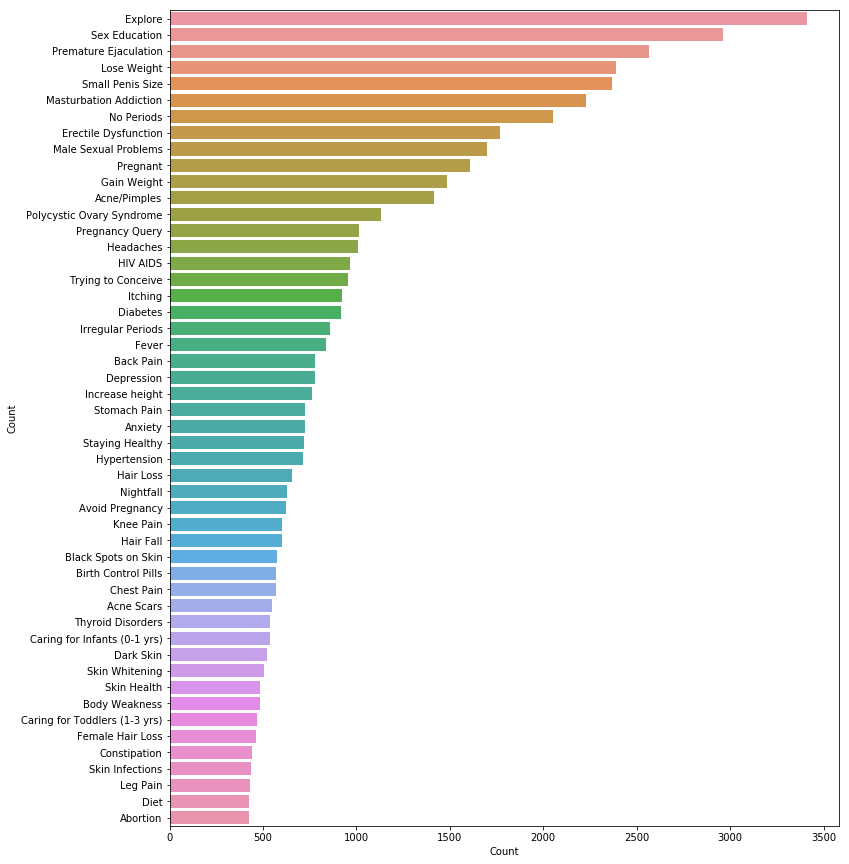

In [11]:
#visualizing the labels with the maximum frequency 
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [12]:
# function for text cleaning 
import re

def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [13]:
#apply the cleaning function to the body of our dataframe
df['clean_body'] = df['body'].apply(lambda x: clean_text(x))


In [14]:
df.head()

,code,body,result,clean_body
0,2552272216,Does honey changes black hair into white ?,[Greying Hair],does honey changes black hair into white
1,2552210209,"Hello doctor,my mother was diagnosed with depression at the age of 36 due to over thinking about the family problems. Which caused her depression which caused several other mental problems and made her condition worse which resulted into a brain stroke and she passed away. Now my question iscan ...",[Depression],hello doctor my mother was diagnosed with depression at the age of due to over thinking about the family problems which caused her depression which caused several other mental problems and made her condition worse which resulted into a brain stroke and she passed away now my question iscan it ha...
2,2552109491,"I am 35 years old, having a baby boy 1 years old. I got pregnant in feb and done abortion on 25 march. Everything is normal after consulting with doctor. But after that I consume I pill due to unprotected sex and next day my period again come with heavy flow n till continue right now. please sug...",[Pregnant],i am years old having a baby boy years old i got pregnant in feb and done abortion on march everything is normal after consulting with doctor but after that i consume i pill due to unprotected sex and next day my period again come with heavy flow n till continue right now please suggest me is an...
3,2552189482,Need to know any silent mri available in bangalore or any other city in india.We need to go for mri scanning of our kid and he is not able to sleep with the louder sounds with the normal mri.,[Difficulty Sleeping],need to know any silent mri available in bangalore or any other city in india we need to go for mri scanning of our kid and he is not able to sleep with the louder sounds with the normal mri
4,2552189193,My 1 year n9 month son is suffering from cough cold fever. I am giving him medicine but I have miss the antibiotics dose now can I continue giving him antibiotics that miss dose.,[Cold Cough],my year n month son is suffering from cough cold fever i am giving him medicine but i have miss the antibiotics dose now can i continue giving him antibiotics that miss dose


In [ ]:
#In the clean_body column, all the text is in lowercase and there are also no punctuation marks. 

In [ ]:
#The function below will visualize the words and their frequency.



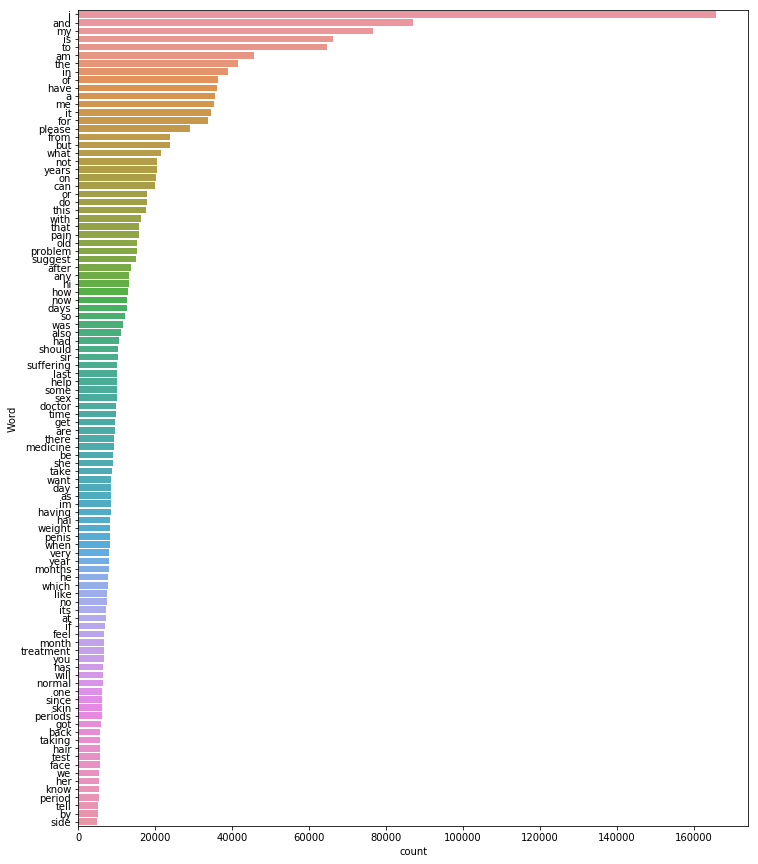

In [15]:
#function to print the most frequent words 
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(df['clean_body'], 100)

In [ ]:
#Most of the terms in the above clean_body are stopwords. 
#These stopwords carry far less meaning than other keywords in the text (they just add noise to the data). 
#I’m going to go ahead and remove them from the plots’ text.
#You can download the list of stopwords from the nltk library:

In [19]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divyanshraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stop_words = set(stopwords.words('english'))

# function to remove stopwords and stemming the words
def remove_stopwords(text):
    ps = PorterStemmer()
    no_stopword_text = [ps.stem(w) for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df['clean_body'] = df['clean_body'].apply(lambda x: remove_stopwords(x))


In [ ]:
#Check the most frequent terms sans the stopwords:


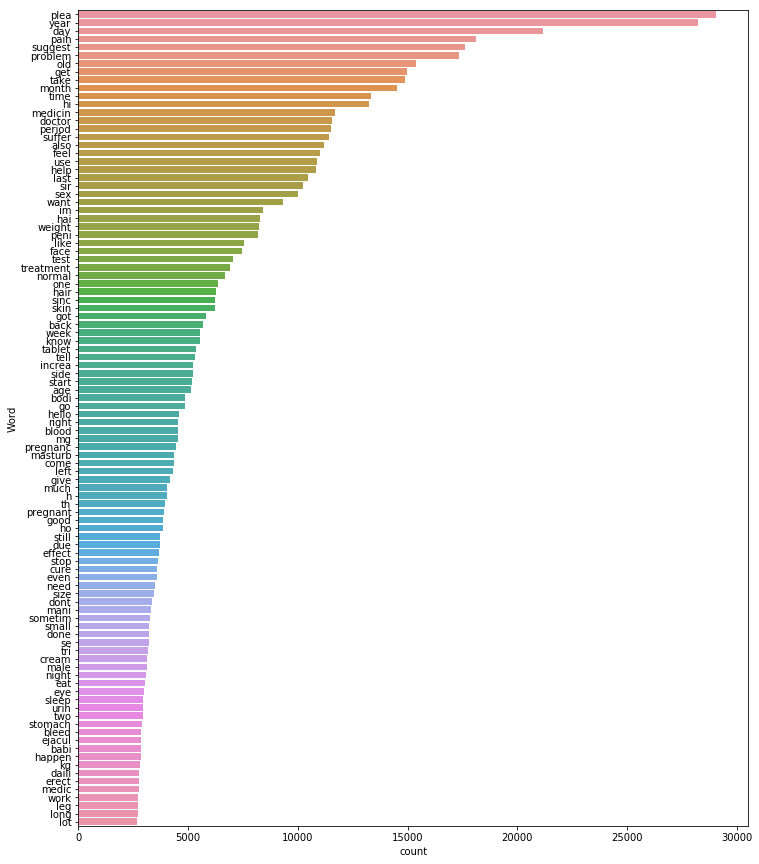

In [21]:
#most frequent words after the preprocessing of the body
freq_words(df['clean_body'], 100)


In [22]:
df.head()

,code,body,result,clean_body
0,2552272216,Does honey changes black hair into white ?,[Greying Hair],honey chang black hair white
1,2552210209,"Hello doctor,my mother was diagnosed with depression at the age of 36 due to over thinking about the family problems. Which caused her depression which caused several other mental problems and made her condition worse which resulted into a brain stroke and she passed away. Now my question iscan ...",[Depression],hello doctor mother diagno depress age due think famili problem cau depress cau sever mental problem made condit wor result brain stroke pass away question iscan happen sister also point
2,2552109491,"I am 35 years old, having a baby boy 1 years old. I got pregnant in feb and done abortion on 25 march. Everything is normal after consulting with doctor. But after that I consume I pill due to unprotected sex and next day my period again come with heavy flow n till continue right now. please sug...",[Pregnant],year old babi boy year old got pregnant feb done abort march everyth normal consult doctor consum pill due unprotect sex next day period come heavi flow n till continu right plea suggest anyth seriou normal
3,2552189482,Need to know any silent mri available in bangalore or any other city in india.We need to go for mri scanning of our kid and he is not able to sleep with the louder sounds with the normal mri.,[Difficulty Sleeping],need know silent mri avail bangalor citi india need go mri scan kid abl sleep louder sound normal mri
4,2552189193,My 1 year n9 month son is suffering from cough cold fever. I am giving him medicine but I have miss the antibiotics dose now can I continue giving him antibiotics that miss dose.,[Cold Cough],year n month son suffer cough cold fever give medicin miss antibiot dose continu give antibiot miss dose


In [23]:
# remove samples with no body
df_new = df[~(df['clean_body'].str.len() == 0)]
df_new.shape, df.shape


((89641, 4), (89737, 4))

In [ ]:
#we will treat this multi-label classification problem as a Binary Relevance problem. 
#Hence, we will now one hot encode the target variable, i.e., genre_new by using sklearn’s MultiLabelBinarizer( ). 
#Since there are 2117 unique labels, there are going to be 2117 new target variables.



In [24]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df_new['result'])

# transform target variable
y = multilabel_binarizer.transform(df_new['result'])

In [ ]:
#Now, it’s time to turn our focus to extracting features from the cleaned version of the df['clean_body'] data. 
#I will be using TF-IDF features. 

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split

# there are some different approaches to transform text to features , here we use the tfidf approach for feature extraction 
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=40000)

#I have used the 40,000 most frequent words in the data as my features. 
#we can try any other number as well for the max_features parameter.



In [ ]:
#Now, before creating TF-IDF features, we will split our data into train and validation sets for training and evaluating our model’s performance. 
#I’m going with a 80-20 split – 80% of the data samples in the train set and the rest in the validation set:



In [43]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(df_new['clean_body'], y, test_size=0.2, random_state=9)


In [ ]:
#Now we can create features for the train and the validation set:

In [45]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)


In [ ]:
#We are all set for the model building part.

#we will have to build a model for every one-hot encoded target variable. Since we have 2117 target variables, 
#we will have to fit 363 different models with the same set of predictors (TF-IDF features).

#training 2117 models can take a considerable amount of time on a modest system.
#Hence, I will build a Logistic Regression model as it is quick to train on limited computational power:



In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from skmultilearn.adapt import MLkNN
from sklearn.tree import DecisionTreeClassifier

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [ ]:
#We will use sk-learn’s OneVsRestClassifier class to solve this problem as a Binary Relevance or one-vs-all problem:



In [59]:
lr = LogisticRegression()
#classifier = MLkNN(k=20)
#classifier = SVC(kernel = 'rbf', random_state = 0,probability = True)
#classifier = GaussianNB()
#classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 9)

clf = OneVsRestClassifier(lr)

In [ ]:
#Finally, fit the model on the train set:


In [60]:
# fit model on train data
clf.fit(xtrain_tfidf,ytrain)

/Users/divyanshraj/anaconda/lib/python3.5/site-packages/sklearn/multiclass.py:70: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
/Users/divyanshraj/anaconda/lib/python3.5/site-packages/sklearn/multiclass.py:70: UserWarning: Label not 4 is present in all training examples.
  str(classes[c]))
/Users/divyanshraj/anaconda/lib/python3.5/site-packages/sklearn/multiclass.py:70: UserWarning: Label not 10 is present in all training examples.
  str(classes[c]))
/Users/divyanshraj/anaconda/lib/python3.5/site-packages/sklearn/multiclass.py:70: UserWarning: Label not 33 is present in all training examples.
  str(classes[c]))
/Users/divyanshraj/anaconda/lib/python3.5/site-packages/sklearn/multiclass.py:70: UserWarning: Label not 46 is present in all training examples.
  str(classes[c]))
/Users/divyanshraj/anaconda/lib/python3.5/site-packages/sklearn/multiclass.py:70: UserWarning: Label not 122 is present in all training examples.
  str(classes[c]))
/Users/divyanshra

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [ ]:
#While training the data we will see some warnings which indicate that some particular low frequency labels are missing
#from our training set. This is because when we split our data in training and validation set , there might be few 
#low frequecy tags which may not even occur once in out training set.

In [ ]:
#Predict movie genres on the validation set:

In [61]:
# make predictions for validation set
y_pred_proba = clf.predict_proba(xval_tfidf)

[0.5110071229340033, 0.49521966765308445, 0.45989812383332812, 0.42134183569635708, 0.38305801411832158, 0.34015807301467821, 0.29606064176583796, 0.24779848453819378, 0.18268651579037945]


Text(0, 0.5, 'f1_score')

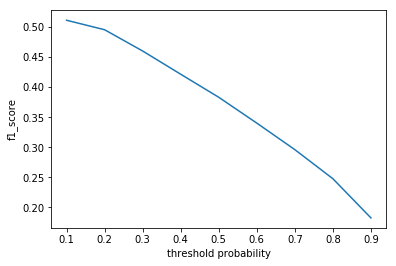

In [62]:
#selecting the best threshold probability 
t = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # threshold values
f1 = []
for i in t:
    y_pred = (y_pred_proba >= i).astype(int)
    f1.append(f1_score(yval, y_pred, average="micro"))

print(f1)
plt.plot(t,f1)
plt.xlabel('threshold probability')
plt.ylabel('f1_score')

In [ ]:
#Now set the threshold value equal to the threshold corresponding to which we got the highest f1 score

In [63]:
t = 0.1 #threshold value
y_pred = (y_pred_proba >= t).astype(int)



In [70]:
np.set_printoptions(threshold=np.inf)#to print the entire array and not a truncated form of the array 

np.array(y_pred[3])


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [68]:
#It is a binary one-dimensional array of length 2117. Basically, it is the one-hot encoded form of the unique labels. 
#We will have to find a way to convert it into  result labels.

# We will use the inverse_transform( ) function along with the MultiLabelBinarizer( ) object to convert the predicted 
#arrays into result label tags:



In [64]:
multilabel_binarizer.inverse_transform(y_pred)[1003]


('Caring for Infants (0-1 yrs)',)

In [65]:
multilabel_binarizer.inverse_transform(yval)[1003]



('Caring for Infants (0-1 yrs)',)

In [41]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.5110071229340033

In [ ]:
# We also have to take care of the new data that will come in the future. 
#Our label prediction system should be able to take a  text body in raw form as input and generate its label tag(s).

#To achieve this, we build an inference function. It will take a body text and follow the below steps:

#Clean the text
#Remove stopwords from the cleaned text
#Extract features from the text
#Make predictions
#Return the predicted movie genre tags


In [71]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [ ]:
#Let’s test this inference function on a few samples from our validation set:


In [76]:
for i in range(5): 
  k = xval.sample(1).index[0] 
  print("Body: ", df_new['body'][k], "\nPredicted labels: ", infer_tags(xval[k])), print("Actual label: ",df_new['result'][k], "\n")


Body:  One of my friends has this issue Pain and little blood coming during stool. 
Predicted labels:  [('Blood in Stools',)]
Actual label:  ['Blood in Stools'] 

Body:  Is masturbating is bad for the age of 16 if no so how many time can I do in a weak. 
Predicted labels:  [('Masturbation Addiction',)]
Actual label:  ['Masturbation Addiction'] 

Body:  I am 19 years old. I'm have now 85 kgs weight. But I would like to weight loss upto 75 kgs in 2 months. So please suggest me what to do? 
Predicted labels:  [('Lose Weight',)]
Actual label:  ['Lose Weight'] 

Body:  Hi, My triglyceride is 194. Suggest me. 
Predicted labels:  [()]
Actual label:  ['High Cholesterol'] 

Body:  Does viagra increase my sex drive tell me because I am suffering with this two problem premature ejaculations and erectile dysfunction tell me. 
Predicted labels:  [('Premature Ejaculation',)]
Actual label:  ['Premature Ejaculation'] 

